In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Code for Answer 2:


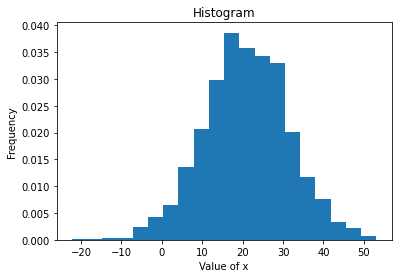

In [5]:
mu_original = 21
sigma_original = 10.5
x_data = mu_original + np.random.randn(2000)*sigma_original
mu_observed = np.mean(x_data)
plt.hist(x_data, density = True, bins = 20)
plt.xlabel("Value of x")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

## Code for Answer 3:

In [6]:
def prior(theta):
    sigma = theta[1]
    if sigma > 0:
        return 1
    else:
        return 0

## Code for Answer 4:

In [7]:
def t_model(theta): 
    return [theta[0], np.random.normal(theta[1], 1)]

**Answer 5:**
Taking logarithm is helpful because the log of multiplication of probabilities is equal to sum of the log of individual probabilities which make it easier to differenciate and avoids complicated computations as:

> $\log \left(\prod_i P(x_i)\right) = \sum_i \log \left( P(x_i)\right)$

Log is also monotonically increasing so maximizing likelihood is equivalent to maximizing log likelihood.

## Code for Answer 5:

In [8]:
def log_likelihood(x_data, mu, sigma):
    c = 1/np.sqrt(2*math.pi*(sigma**2))
    L = 0
    for i in range(len(x_data)):        
        var = np.exp(-(x_data[i] - mu)**2/(2*(sigma**2)))
        L += np.log(c*var)
    return L

## Code for Answer 6:

In [9]:
def acceptance(theta_current, theta_new):
    L_new = log_likelihood(x_data, mu_observed, theta_new[1])
    L_current = log_likelihood(x_data, mu_observed, theta_current[1])
    prior_new = prior(theta_new)
    prior_current = prior(theta_current)
    numerator = L_new + np.log(prior_new)
    deno = L_current + np.log(prior_current)
    alpha = min(1, np.exp(numerator-deno))
    unif = np.random.rand(1,1)
    if alpha > unif:
        return True
    else: 
        return False

## Code for Answer 7:

In [10]:
def metropolis_algorithm(initial_param, no_of_iterations):
    sigma = {}
    x = initial_param
    for i in range(no_of_iterations):
        x_next = t_model(x)
        if acceptance(x, x_next):
            x = x_next
            sigma[i] = ['accepted', x_next[1]]
        else:
            sigma[i] = ['rejected', x_next[1]]
    return sigma

In [13]:
initial_theta = [21, 0.1]
no_of_iterations = 50000
accepted = []
rejected = []
accept_iter = []
reject_iter = []
all_sigma = metropolis_algorithm(initial_theta, no_of_iterations)

<ipython-input-8-e65345ca5ed0>:6: RuntimeWarning: divide by zero encountered in log
  L += np.log(c*var)
<ipython-input-9-95d9ce9d7e3f>:8: RuntimeWarning: invalid value encountered in double_scalars
  alpha = min(1, np.exp(numerator-deno))
<ipython-input-9-95d9ce9d7e3f>:7: RuntimeWarning: divide by zero encountered in log
  deno = L_current + np.log(prior_current)
<ipython-input-9-95d9ce9d7e3f>:8: RuntimeWarning: overflow encountered in exp
  alpha = min(1, np.exp(numerator-deno))


In [14]:
for i in range(500):
    if all_sigma[i][0] == 'accepted':
        accepted.append(all_sigma[i][1])
        accept_iter.append(i)
    else:
        rejected.append(all_sigma[i][1])
        reject_iter.append(i)

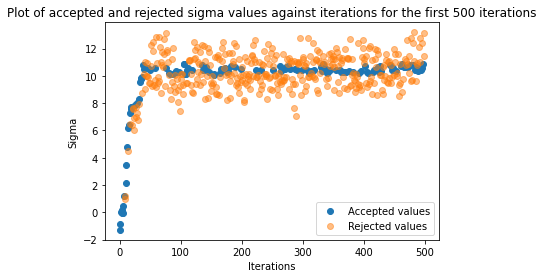

In [15]:
plt.scatter(accept_iter, accepted, label = "Accepted values", alpha = 1)
plt.scatter(reject_iter, rejected, label = "Rejected values", alpha = 0.5)
plt.ylabel("Sigma")
plt.xlabel("Iterations")
plt.title("Plot of accepted and rejected sigma values against iterations for the first 500 iterations")
plt.legend()
plt.show()

In [16]:
for i in range(no_of_iterations):
    if all_sigma[i][0] == 'accepted':
        accepted.append(all_sigma[i][1])
        accept_iter.append(i)
    else:
        rejected.append(all_sigma[i][1])
        reject_iter.append(i)

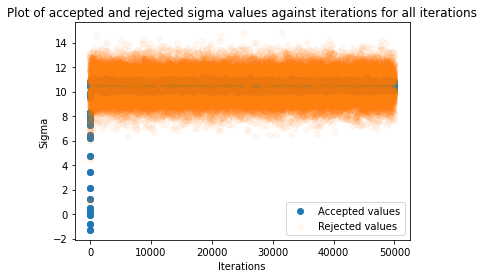

In [17]:
plt.scatter(accept_iter, accepted, label = "Accepted values", alpha = 1)
plt.scatter(reject_iter, rejected, label = "Rejected values", alpha = 0.05)
plt.ylabel("Sigma")
plt.xlabel("Iterations")
plt.title("Plot of accepted and rejected sigma values against iterations for all iterations")
plt.legend()
plt.show()

**Observations:** The initial accepted sigma values are far away from our original sigma value (=10.5) and after a brief warm-up period, the accepted values lie in a neighbourhood of 10.5. Also, the number of rejected sigma values is more than the number of accepted sigma values.

## Code for Answer 8:

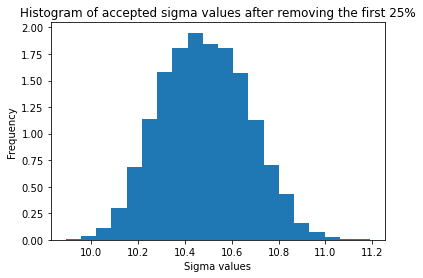

In [18]:
plt.hist(accepted[int(len(accepted)*0.25):], density = True, bins = 20)
plt.xlabel("Sigma values")
plt.ylabel("Frequency")
plt.title("Histogram of accepted sigma values after removing the first 25%")
plt.show()

**Observations:** The histogram is normally distributed with mean close to our original sigma value which is 10.5.

We discard the first 25% of the sigma values as the initial phase is a brief warm up phase. For small values of iterations, accepted sigma values lie far away from the original sigma value which is 10.5. After a few iterations, the posterior keeps changing and the algorithm learns to accept the correct sigma values better.


## Code for Answer 9:

In [19]:
def prior_new(theta):
    sigma = theta[1]
    if sigma > 0:
        return 1*0.1
    else:
        return 0

In [20]:
def t_model_new(theta): 
    return (np.random.multivariate_normal(theta, np.identity(len(theta))))

In [21]:
def acceptance_new(theta_current, theta_new):
    L_new = log_likelihood(x_data, theta_new[0], theta_new[1])
    L_current = log_likelihood(x_data, theta_current[0], theta_current[1])
    prior_new1 = prior_new(theta_new)
    prior_current1 = prior_new(theta_current)
    numerator = L_new + np.log(prior_new1)
    deno = L_current + np.log(prior_current1)
    alpha = min(1, np.exp(numerator-deno))
    unif = np.random.rand(1,1)
    if alpha > unif:
        return True
    else: 
        return False

In [22]:
def metropolis_algorithm_new(initial_param, no_of_iterations):
    sigma = {}
    x = initial_param
    for i in range(no_of_iterations):
        x_next = t_model_new(x)
        if acceptance_new(x, x_next):
            x = x_next
            sigma[i] = ['accepted', x_next]
        else:
            sigma[i] = ['rejected', x_next]
    return sigma

## Code for Answer 10:

In [27]:
initial_theta_new = [10.5, 0.1]
no_of_iterations = 50000
all_sigma_new = metropolis_algorithm_new(initial_theta_new, no_of_iterations)

<ipython-input-8-e65345ca5ed0>:6: RuntimeWarning: divide by zero encountered in log
  L += np.log(c*var)
<ipython-input-21-f6663b068bcb>:8: RuntimeWarning: invalid value encountered in double_scalars
  alpha = min(1, np.exp(numerator-deno))
<ipython-input-21-f6663b068bcb>:7: RuntimeWarning: divide by zero encountered in log
  deno = L_current + np.log(prior_current1)
<ipython-input-21-f6663b068bcb>:8: RuntimeWarning: overflow encountered in exp
  alpha = min(1, np.exp(numerator-deno))


In [28]:
accepted_new = []
accepted_mu = []
for i in range(no_of_iterations):
    if all_sigma_new[i][0] == 'accepted':
        accepted_new.append(all_sigma_new[i][1][1])
        accepted_mu.append(all_sigma_new[i][1][0])

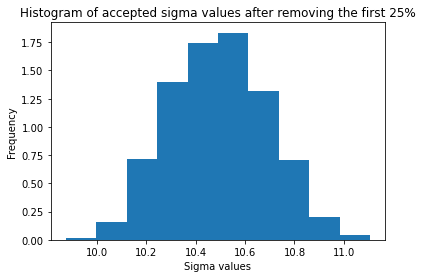

In [29]:
plt.hist(accepted_new[int(len(accepted_new)*0.25):], density = True)
plt.xlabel("Sigma values")
plt.ylabel("Frequency")
plt.title("Histogram of accepted sigma values after removing the first 25%")
plt.show()

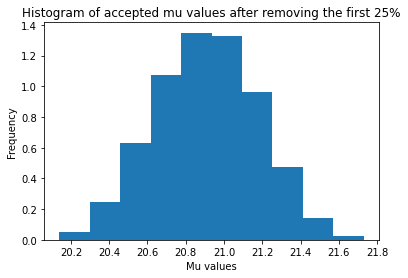

In [30]:
plt.hist(accepted_mu[int(len(accepted_mu)*0.25):], density = True)
plt.xlabel("Mu values")
plt.ylabel("Frequency")
plt.title("Histogram of accepted mu values after removing the first 25%")
plt.show()

**Observations:** Both the histograms are normally distributed. The distribution of sigma has a mean around 10.5 which is the original sigma value and the distribution of mu has a mean around 21 which is the original mu value.